# **LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
## Use the Regression class defined in the previous lab
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    #write code here
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])# write code here

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)# write code here
    
  # By Gradien descent

  def Regression_grad_des(self,x,y,lr):
    eps = 0.000001
    w_old = np.random.randn(x.shape[0],1)
    error1 = 100002.
    error2 = 100000.
    err = []
    while ((error1 - error2) > eps) :
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err

(4, 1)
(4, 100)


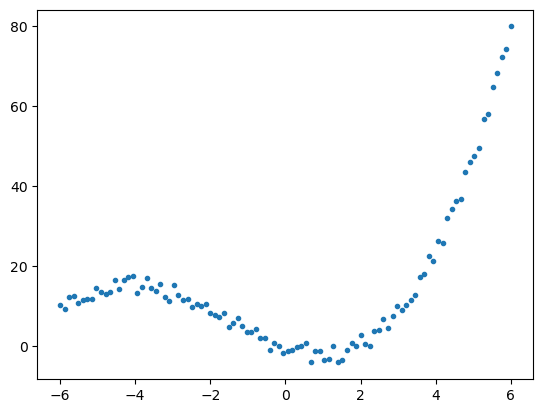

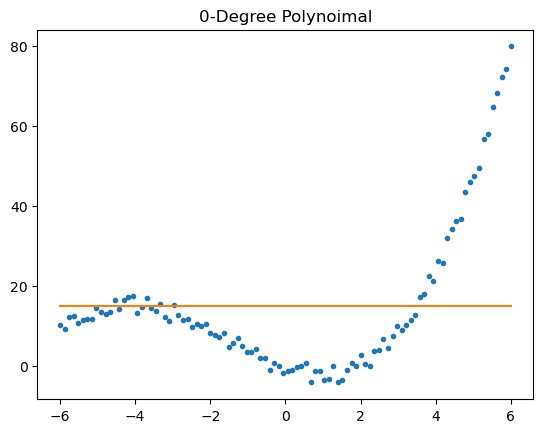

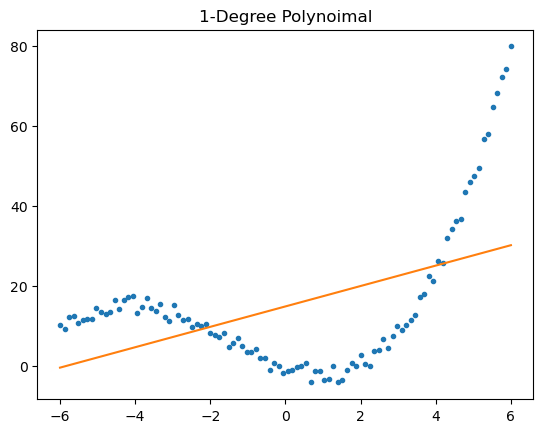

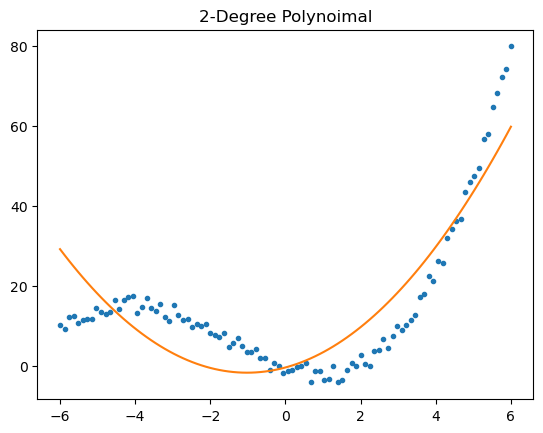

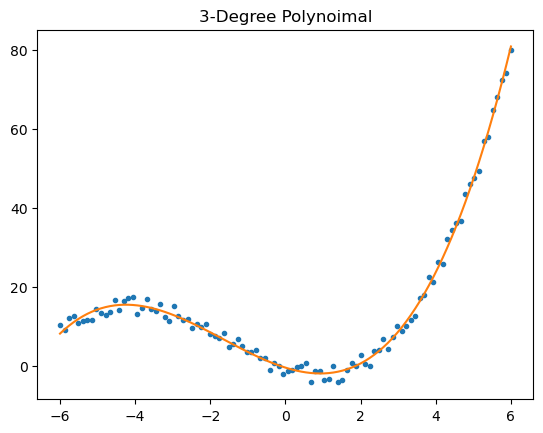

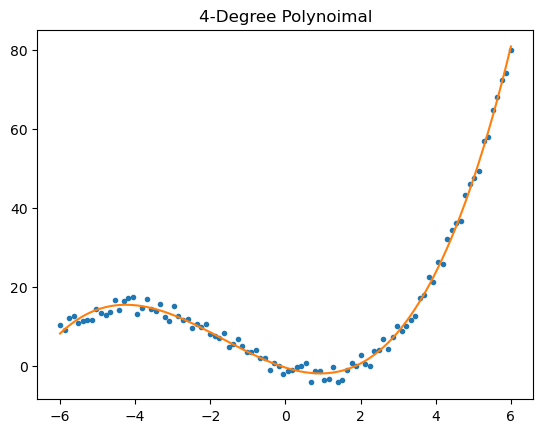

In [4]:
## Data generation

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]

w = np.array([[0.25],[1.25],[-3],[-3]])  ## Define Weights as per the given equation

## Function to transform the data into polynomial

def data_transform(x,degree): 
  X_new = np.zeros((len(x[0]),degree+1))
  i=0
  ## Write your code here
  while degree>=0:
    temp = x**degree
    X_new[:,i] = temp
    degree-=1
    i+=1
  return X_new.T

X = data_transform(x,3)
print(np.shape(w))
print(np.shape(X))
y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# By computation

# Code for degree 0 polynomial fitting

degree = 0
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('0-Degree Polynoimal')


# # Write the code for degree 1 polynomial fitting

degree = 1
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('1-Degree Polynoimal')
# # Write the code for degree 2 polynomial fitting

degree = 2
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('2-Degree Polynoimal')
# # Write the code for degree 3 polynomial fitting

degree = 3
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')
# # Write the code for degree 4 polynomial fitting

degree = 4
X_1 = data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('4-Degree Polynoimal')

plt.show()

4


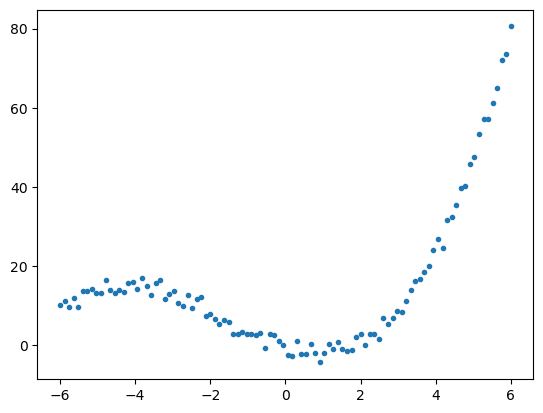

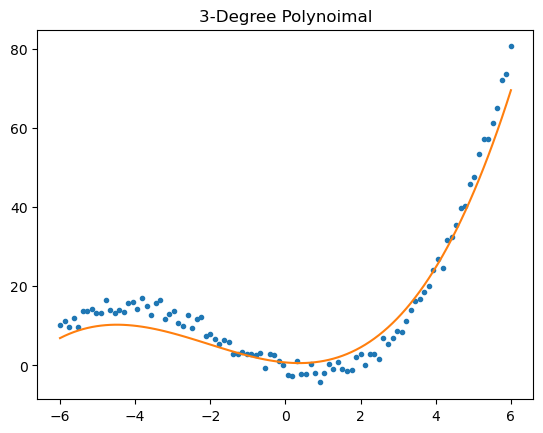

In [5]:
#By Gradient Descent 

x=np.linspace(-6,6,100)
x=x[np.newaxis,:]
w = np.array([[0.25],[1.25],[-3],[-3]])
y = X.T @ w

y = y+5*np.random.uniform(0,1,y.shape)
plt.figure()
plt.plot(x.T,y,'.')
# ## Write your code here

# w_new=np.array([[1],[1],[1],[1]])
# threshold=10**(-10)
# alpha=0.03
# error1=1000000
# error2=1000003
# while (error2-error1)>threshold:
#   y_new=X.T @ w
#   error1=np.sum((y_new-y)**2)/len(y)
#   temp1= (2*np.sum(np.dot((y_new-y),x**3)))/len(y)
#   temp2= (2*np.sum(np.dot((y_new-y),x**2)))/len(y)
#   temp3= (2*np.sum(np.dot((y_new-y),x**1)))/len(y)
#   temp4= (2*np.sum(np.dot((y_new-y),x**0)))/len(y) 
#   w[0]=w[0]-alpha*temp1
#   w[1]=w[1]-alpha*temp2
#   w[2]=w[2]-alpha*temp3
#   w[3]=w[3]-alpha*temp4
#   y_new=X.T @ w
#   error2=np.sum((y_new-y)**2)/len(y)

# y_predict=  X.T @ w_new
# plt.figure()
# plt.plot(x.T,y,'.')
# plt.plot(x.T,y_predict)
# plt.show()

degree = 3
X_1 = data_transform(x,degree)
print(X_1.shape[0])
w_mat,error=reg.Regression_grad_des(X_1,y,0.000000001)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
plt.title('3-Degree Polynoimal')
plt.show()

# Linear Regression

  Generate the data as shown in the figure below


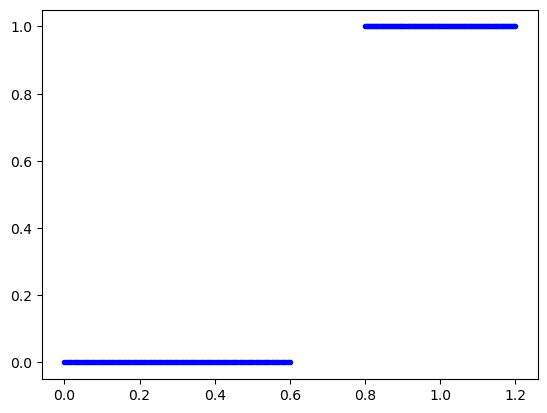

In [6]:
## Write your code here
x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,100)
y2=np.ones(x2.shape)

X=np.concatenate((x1,x2))
Y=np.concatenate((y1,y2))
plt.plot(X,Y,'.',c='b')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [7]:
## Write your Code here
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    #write code here
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])# write code here

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)  # write code here
    
  # By Gradien descent
  
  def Regression_grad_des(self,x,y,lr):
    
    eps = 0.000001
    w_old = np.random.randn(x.shape[0],1)
    error1 = 100002.
    error2 = 100000.
    err = []
    while ((error1 - error2) > eps) :
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err

reg=regression()


  Augment the Data and generate optimal weights

In [8]:
## Write your Code here
X=X[np.newaxis,:]
w=np.array([[-0.25],[1]]) 
x_aug=np.concatenate((np.ones((1,X.shape[1])), X),axis=0)
print(' Shape of x : ',x.shape)
print(' Shape of Augmented x : ',x_aug.shape)
y=x_aug.T @ w  # vector multiplication
# print(y.shape)

# By Computation (Normal Equation)
w_opt=reg.mat_inv(y,x_aug)
# print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
# print(w_pred)



 Shape of x :  (1, 100)
 Shape of Augmented x :  (2, 200)


Using the optimal weights, fit the curve

(200, 1)
[[-0.25]
 [ 1.  ]]
[[-0.01695168]
 [ 0.67456704]]


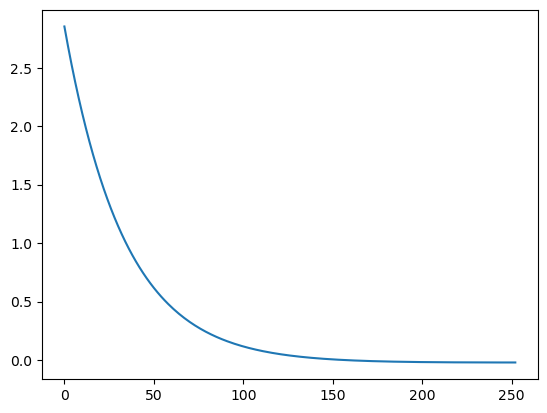

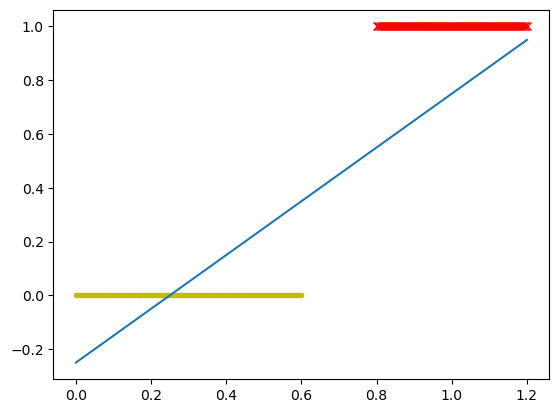

In [9]:
## Write your Code here

print(y.shape)
print(w_opt)
print(w_pred)

# print(err)
plt.figure()
plt.plot(err)

x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,100)
y2=np.ones(x2.shape)
plt.figure()
plt.plot(x1,y1,'.',c='y')
plt.plot(x2,y2,'x',c='r')
y_pred=x_aug.T @ w_opt
plt.plot(x_aug[1].T,y_pred)
plt.show()

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

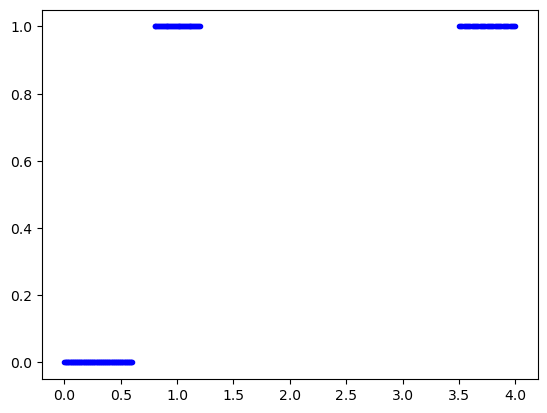

In [10]:
## Write your code here
x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,50)
y2=np.ones(x2.shape)
x3=np.linspace(3.5,4,50)
y3=np.ones(x2.shape)

X=np.concatenate((x1,x2,x3))
Y=np.concatenate((y1,y2,y3))
plt.plot(X,Y,'.',c='b')
plt.show()

 Shape of x :  (1, 100)
 Shape of Augmented x :  (2, 200)
(200, 1)
[[-0.25]
 [ 1.  ]]
[[-0.2502241 ]
 [ 1.00008904]]


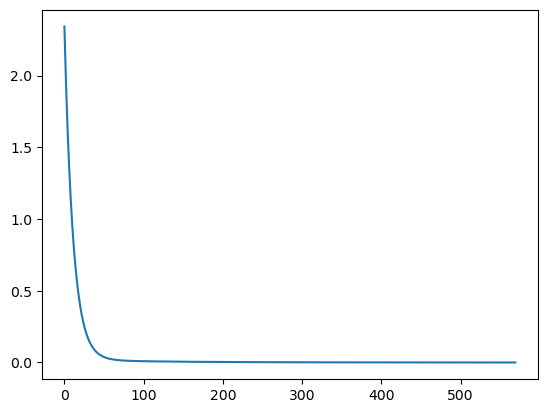

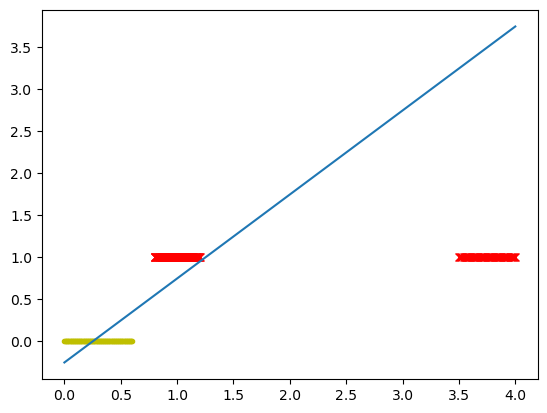

In [11]:
## Write your code here
X=X[np.newaxis,:]
w=np.array([[-0.25],[1]]) 
x_aug=np.concatenate((np.ones((1,X.shape[1])), X),axis=0)
print(' Shape of x : ',x.shape)
print(' Shape of Augmented x : ',x_aug.shape)
y=x_aug.T @ w  # vector multiplication
# print(y.shape)

# By Computation (Normal Equation)
w_opt=reg.mat_inv(y,x_aug)
# print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
# print(w_pred)
print(y.shape)
print(w_opt)
print(w_pred)

plt.figure()
plt.plot(err)

x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,100)
y2=np.ones(x2.shape)
plt.figure()
plt.plot(x1,y1,'.',c='y')
plt.plot(x2,y2,'x',c='r')
plt.plot(x3,y3,'x',c='r')
y_pred=x_aug.T @ w_opt

plt.plot(x_aug[1].T,y_pred)
plt.show()

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

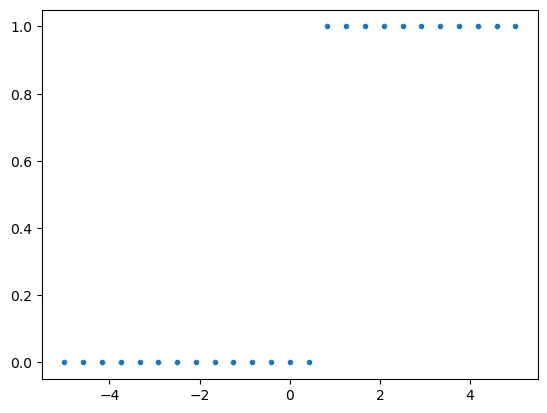

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [13]:
# search space (only w1 is searched, where as w0 is fixed)
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)


cost_fn_mse=[]
cost_fn_logis=[]
for i in range(w1.shape[0]):
 # insert your code here
  y_pred = 1/(1+np.exp(-w1[i]*x-w0))
  cost_mse = (1/(2*x.shape[0]))*np.sum(np.square(y_pred-y))
  cost_fn_mse.append(cost_mse)
  cost_logis = 0
  for yi,yip in zip(y,y_pred):
    # print(yi,yip)
    if yi == 0 :
      if (1-yip)<0.01:
        cost_logis += 5
      else :
        cost_logis += np.log(1-yip)
    if yi == 1 :
      if yip<0.01:
        cost_logis += 5
      else:
        cost_logis += np.log(yip)
    # cost_logis += np.log(yip)
  cost_logis /= (-len(y))
  cost_fn_logis.append(cost_logis)




/tmp/ipykernel_66547/575863859.py:4: RuntimeWarning: invalid value encountered in log
  plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')


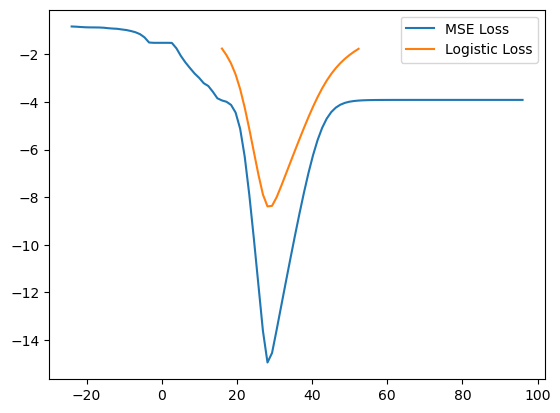

In [15]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.legend()

plt.show()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

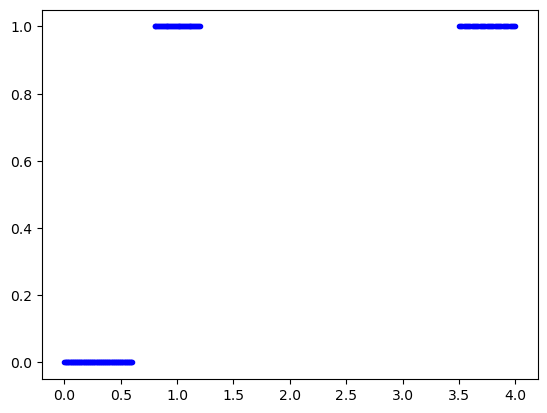

In [16]:
## Write your Code here
x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,50)
y2=np.ones(x2.shape)
x3=np.linspace(3.5,4,50)
y3=np.ones(x2.shape)

X=np.concatenate((x1,x2,x3))
Y=np.concatenate((y1,y2,y3))
plt.plot(X,Y,'.',c='b')
plt.show()

Define a Logistic Regression class

In [17]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    # write code here
    return 1/(1+np.exp(-(x.T@w_old)))

  def grad_update(self,w_old,lr,y,x):
    # write code here
    w = w_old - (2*lr)*(x@((self.logis(x,w_old))-y))/(y.shape[0])
    return w

  def error(self,w,y,x):
    y_pred=self.logis(x,w)
    return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here

  def Regression_grad_des(self,x,y,lr):
    # print(x.shape[0])
    err=[]
    w_pred = np.random.rand(x.shape[0],1)
    # print(w_pred.shape)
    error1 = self.error(w_pred,y,x)
    for i in range(1000):
      w_pred = self.grad_update(w_pred,lr,y,x)
      error_new = self.error(w_pred,y,x)
      err.append(error_new)
      dev = error1 - error_new
      if dev<=10**(-10):
        break
      error1 = error_new
    err = np.array(err)
    # print(w_pred.shape)
    return w_pred,err

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

 Shape of x :  (1, 200)
 Shape of Augmented x :  (2, 200)
(2, 1)
(1000,)


/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: divide by zero encountered in log
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here
/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: invalid value encountered in multiply
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here


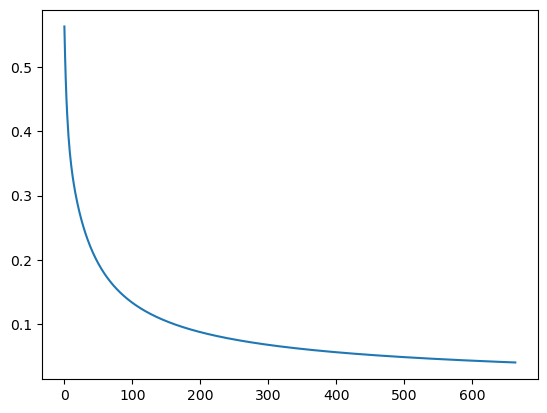

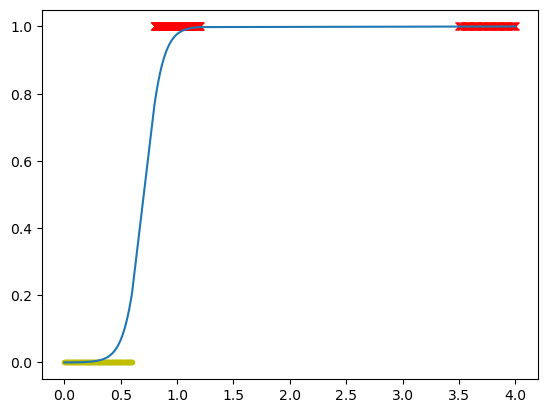

In [18]:
## Write your code here
reg=logis_regression()
X=X[np.newaxis,:]
x_aug=np.concatenate((np.ones((1,X.shape[1])), X),axis=0)

w=np.array([[-0.25],[1]]) 
print(' Shape of x : ',X.shape)
print(' Shape of Augmented x : ',x_aug.shape)
Y=np.asarray(Y).reshape(len(Y),1)
# print(y.shape)
# print(y)
# print(x_aug.shape[0])
# by Gradien descent
w_pred,err=reg.Regression_grad_des(x_aug,Y,0.6)
print(w_pred.shape)
print(err.shape)
plt.figure()
plt.plot(err)


x1=np.linspace(0,0.6,100)
y1=np.zeros(x1.shape)
x2=np.linspace(0.8,1.2,100)
y2=np.ones(x2.shape)
plt.figure()
plt.plot(x1,y1,'.',c='y')
plt.plot(x2,y2,'x',c='r')
plt.plot(x3,y3,'x',c='r')

y_pred=reg.logis(x_aug,w_pred)

plt.plot(x_aug[1].T,y_pred)
plt.show()

# Classification of circularly separated data using logistic regression



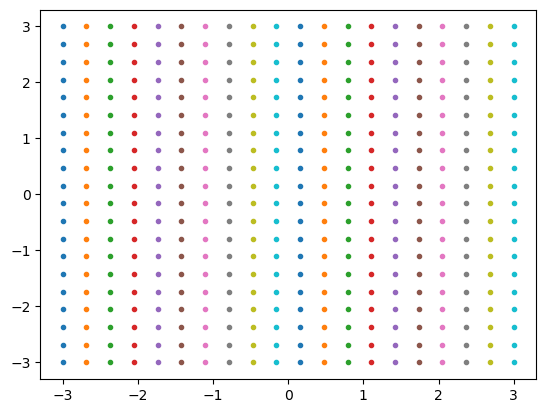

In [19]:
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
plt.show()

  Using the above data generate circular data

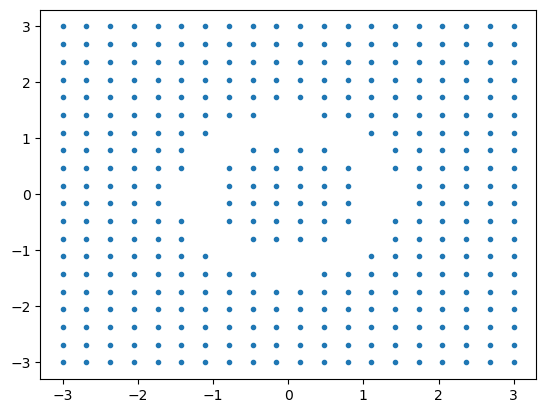

In [20]:
# Write code here
x1=x11.flatten()
x2=x22.flatten()
x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1)

ind1=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)
ind2=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)
x1=x[ind1[0],:]
x2=x[ind2[0],:]
x=np.concatenate((x1,x2))
plt.plot(x[:,0],x[:,1],'.')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

(364, 5)
(364, 1)
(5, 1)


/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: divide by zero encountered in log
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here
/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: invalid value encountered in multiply
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here


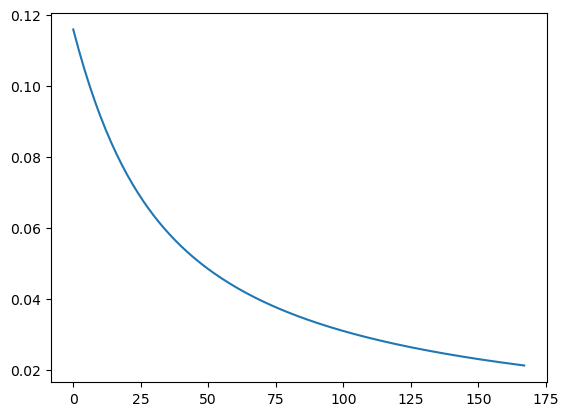

In [21]:
# perform logistic regression
y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))
w1=x[:,0].reshape(len(x[:,0]),1)
w2=x[:,1].reshape(len(x[:,0]),1)
w3=(x[:,0]**2).reshape(len(x[:,0]),1)
w4=(x[:,1]**2).reshape(len(x[:,0]),1)

x_aug=np.concatenate((np.ones((x.shape[0],1)),w1,w2,w3,w4),axis=1)   
print(x_aug.shape)
y=np.asarray(y).reshape(len(y),1)
print(y.shape)
log_reg=logis_regression()
w_pred,err=log_reg.Regression_grad_des(x_aug.T,y,0.6)
print(w_pred.shape)
plt.plot(err)
plt.show()

Plot classification using 0.5 as threshold

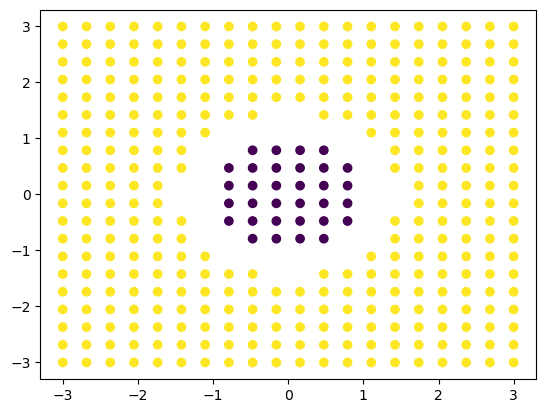

In [22]:
#write code here
y_pred=reg.logis(x_aug.T,w_pred)
c_pred = []
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    c_pred.append(1)
  else:
    c_pred.append(0)

plt.scatter(x[:,0],x[:,1],c=c_pred)



# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

(300,)


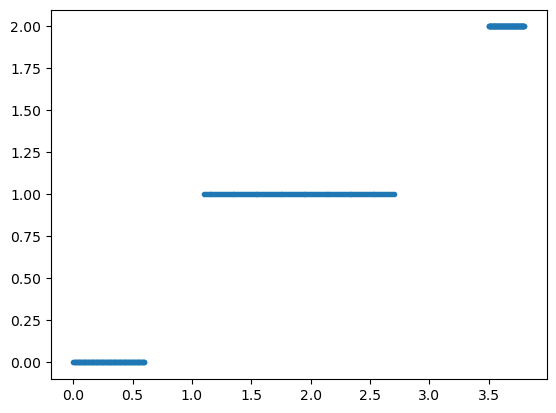

In [24]:
## Write your code here

import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))
print(x.shape)

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

plt.figure()
plt.plot(x,y,'.')

plt.show()


In [25]:
# def data_transform(X,degree): 
#   X_new=[]      
#   for i in range(degree +1):
#     # write code here to generate a polynomial

def data_transform(X,degree): 
  X_new=[]      
  for i in range(degree +1):
    X_new.append(X**i)              
  X_new = np.concatenate(X_new)  
  return X_new

x_aug=data_transform(x[np.newaxis,:],2)


In [26]:
# plot for classification
def plot_op(x,y_pred):
   
  ind0,_=np.where(y_pred<0.5)
  ind1,_=np.where(y_pred>=0.5)
  x0=x[ind0,:]
  x1=x[ind1,:]
  xaxis=x.T[2]
  plt.plot(x0,np.zeros((x0).shape),'o',color='y')
  plt.plot(x1,np.ones((x1).shape),'x',color='r')
  plt.plot(xaxis,y_pred)
  plt.show()
  

Using the above function for plotting, plot the curve using different configurations

(300, 1)
(3, 1)
(300, 1)
(300,)


/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: divide by zero encountered in log
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here
/tmp/ipykernel_66547/1922347226.py:17: RuntimeWarning: invalid value encountered in multiply
  return  (-1/len(y))*np.sum(np.multiply(y,np.log(y_pred))+np.multiply((1-y),np.log(1-y_pred))) # write code here


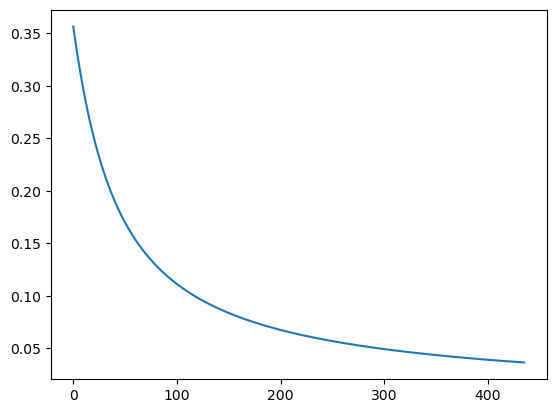

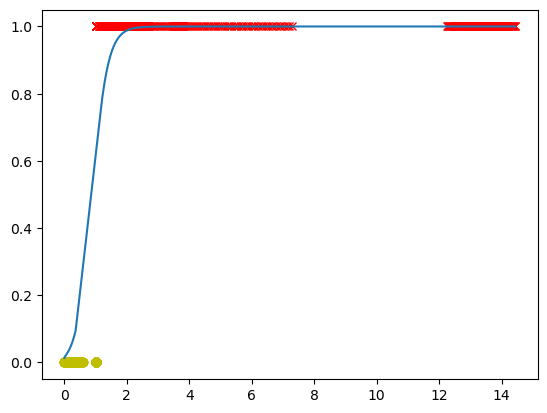

In [27]:
# take class 0 as '0' and other to '1'
## Write your code here

y=np.asarray(y).reshape(len(y),1)
print(y.shape)
y_lb1=y.copy()
for i in range(y.shape[0]):
  if y_lb1[i] == 0:
    y_lb1[i] = 0
  else:
    y_lb1[i] = 1

log_reg=logis_regression()
w_pred1,err1=log_reg.Regression_grad_des(x_aug,y_lb1,0.1)
print(w_pred1.shape)
plt.figure()
plt.plot(err1)

y_pred1=reg.logis(x_aug,w_pred1)
print(y_pred1.shape)
plt.figure()
print(x_aug[0].shape)
plot_op(x_aug.T,y_pred1)
# plt.plot(x_aug[1].T,y_pred)


(3, 1)
(300, 1)


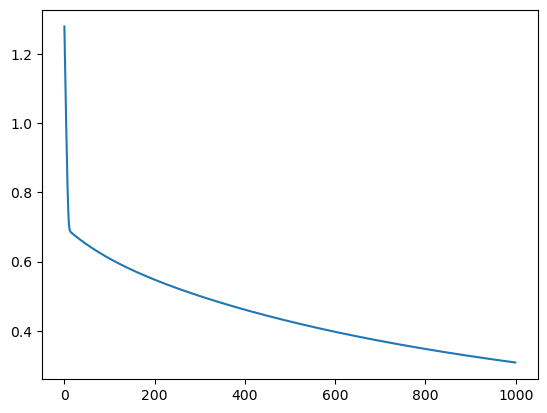

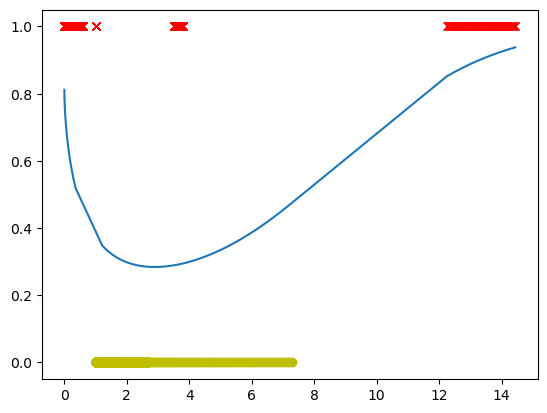

In [28]:
# take class 1 as '0' and other to '1'
## Write your code here
y_lb2=y.copy()

for i in range(y.shape[0]):
  if y_lb2[i] == 1:
    y_lb2[i] = 0
  else:
    y_lb2[i] = 1

log_reg=logis_regression()
w_pred2,err2=log_reg.Regression_grad_des(x_aug,y_lb2,0.02)
print(w_pred2.shape)
plt.figure()
plt.plot(err2)

y_pred2=reg.logis(x_aug,w_pred2)
print(y_pred2.shape)
plt.figure()
plot_op(x_aug.T,y_pred2)
# plt.plot(x_aug[1].T,y_pred)

(300, 1)
(3, 1)
(300, 1)


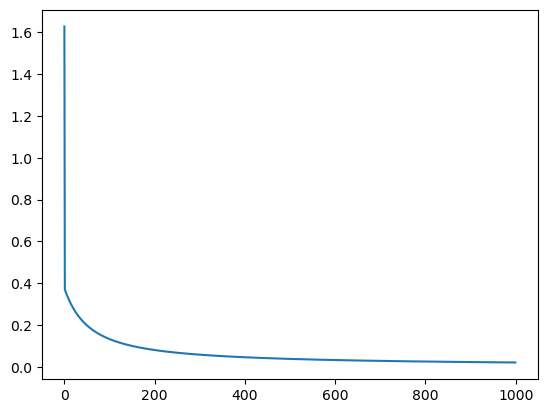

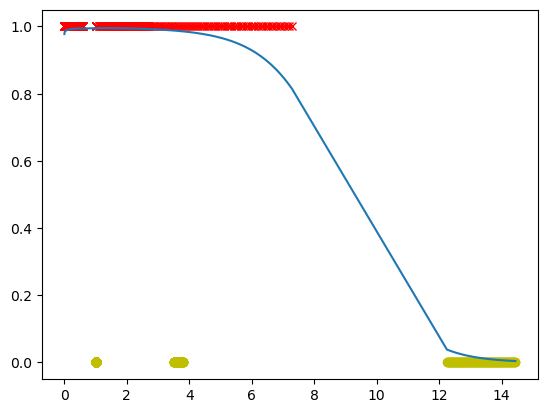

In [29]:
# Take class 2 as '0' and other to '1'
## Write your code here
print(y.shape)
y_lb3=y.copy()
for i in range(y.shape[0]):
  if y_lb3[i] == 2:
    y_lb3[i] = 0
  else:
    y_lb3[i] = 1

log_reg=logis_regression()
w_pred3,err3=log_reg.Regression_grad_des(x_aug,y_lb3,0.05)
print(w_pred3.shape)
plt.figure()
plt.plot(err3)

y_pred3=reg.logis(x_aug,w_pred3)
print(y_pred3.shape)
plt.figure()
plot_op(x_aug.T,y_pred3)
# plt.plot(x_aug[1].T,y_pred3)


(300, 3)


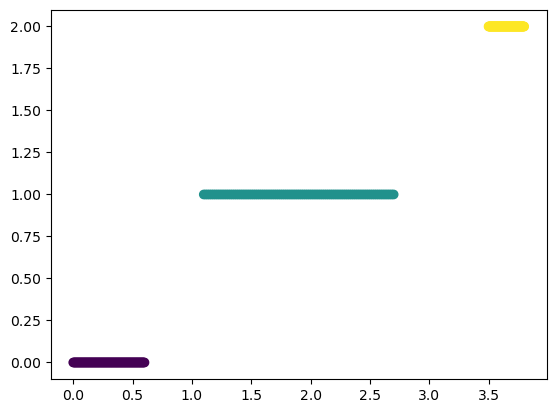

In [31]:
# final classification
## Write your code here
clr=[]

y_pred=np.concatenate((y_pred1,y_pred2,y_pred3),axis=1)
clr=np.argmin(y_pred,axis=1)
print(y_pred.shape)
# print(clr)
plt.scatter(x,y,c=clr)
plt.show()